In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [20]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['SOL.JO', 'LEW.JO', 'VOD.JO', 'TKG.JO', 'APN.JO', 'MCG.JO', 'STX40.JO', 'ARI.JO', 'MST.JO', 'AFT.JO', 'CSB.JO']

In [22]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [23]:
#Assign weights to the stocks.
weights = np.array([0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091]) #20 percent each

In [24]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [25]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [26]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-06'

In [27]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [28]:
#Show the df
df

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,38441.902344,7951.672363,8847.368164,2897.614746,9660.599609,NaN,NaN,16986.228516,557.963196,420.826538,11750.080078
2012-01-03,38990.359375,8064.771484,9027.300781,2907.589111,9902.414062,NaN,2934.0,17482.902344,577.890381,428.804382,11301.984375
2012-01-04,39288.515625,8100.486816,8977.593750,2902.601807,9880.431641,NaN,2943.0,17631.904297,562.945007,423.818237,11320.903320
2012-01-05,38571.527344,7907.027832,8897.076172,2867.690918,9892.422852,NaN,2905.0,17289.201172,561.948547,418.832092,11588.765625
2012-01-06,38613.417969,7901.075195,9094.898438,2862.703613,10027.318359,NaN,2926.0,17352.771484,559.955933,418.832092,11451.350586
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30,36251.000000,4797.000000,15988.000000,4388.000000,20000.000000,12886.0,6940.0,28574.000000,1499.000000,6790.000000,27499.000000
2022-03-31,35500.000000,4700.000000,16000.000000,4448.000000,19863.000000,13173.0,6933.0,28615.000000,1495.000000,6950.000000,27539.000000
2022-04-01,35981.000000,4601.000000,16214.000000,4424.000000,20061.000000,13249.0,6995.0,29145.000000,1498.000000,6921.000000,28500.000000


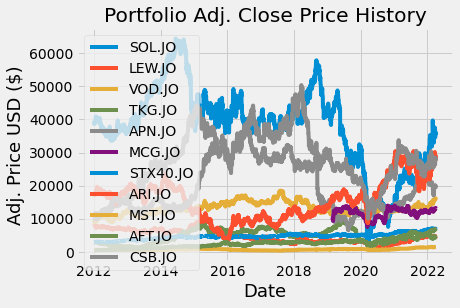

In [29]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [30]:
#Show the daily simply return
returns = df.pct_change()
returns

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.014267,0.014223,0.020337,0.003442,0.025031,NaN,NaN,0.029240,0.035714,0.018958,-0.038136
2012-01-04,0.007647,0.004429,-0.005506,-0.001715,-0.002220,NaN,0.003067,0.008523,-0.025862,-0.011628,0.001674
2012-01-05,-0.018249,-0.023882,-0.008969,-0.012027,0.001214,NaN,-0.012912,-0.019437,-0.001770,-0.011765,0.023661
2012-01-06,0.001086,-0.000753,0.022235,-0.001739,0.013636,NaN,0.007229,0.003677,-0.003546,0.000000,-0.011858
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30,0.048141,-0.005803,0.008834,0.025234,0.000000,-0.003249,0.008428,0.005207,-0.000667,0.009665,0.013414
2022-03-31,-0.020717,-0.020221,0.000751,0.013674,-0.006850,0.022272,-0.001009,0.001435,-0.002668,0.023564,0.001455
2022-04-01,0.013549,-0.021064,0.013375,-0.005396,0.009968,0.005769,0.008943,0.018522,0.002007,-0.004173,0.034896


In [31]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
SOL.JO,0.267954,0.018477,0.018853,0.046794,0.027151,0.029287,0.041921,0.072934,0.007907,0.011712,0.025563
LEW.JO,0.018477,0.192420,0.013022,0.019423,0.010510,0.013436,0.013131,0.020078,0.003189,0.009803,0.019100
VOD.JO,0.018853,0.013022,0.055744,0.027062,0.019957,0.031332,0.015139,0.014959,0.003361,0.002865,0.007567
TKG.JO,0.046794,0.019423,0.027062,0.173568,0.020146,0.038059,0.021179,0.030556,0.011347,0.006285,0.021050
APN.JO,0.027151,0.010510,0.019957,0.020146,0.117992,0.026120,0.020530,0.024552,0.003868,0.005085,0.010297
MCG.JO,0.029287,0.013436,0.031332,0.038059,0.026120,0.106640,0.016187,0.024754,0.005483,0.014686,0.010051
STX40.JO,0.041921,0.013131,0.015139,0.021179,0.020530,0.016187,0.031527,0.035601,0.004419,0.005925,0.011498
ARI.JO,0.072934,0.020078,0.014959,0.030556,0.024552,0.024754,0.035601,0.180233,0.011184,0.007006,0.015037
MST.JO,0.007907,0.003189,0.003361,0.011347,0.003868,0.005483,0.004419,0.011184,0.121963,0.003283,0.000938
AFT.JO,0.011712,0.009803,0.002865,0.006285,0.005085,0.014686,0.005925,0.007006,0.003283,0.118028,0.007719


In [32]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.028095705703606616

In [33]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.16761773684072523

In [34]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.13601217163312296

In [35]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 14.000000000000002%
Annual volatility / risk: 17.0%
Annual variance: 3.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [36]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [37]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('SOL.JO', 0.0), ('LEW.JO', 0.0), ('VOD.JO', 0.01708), ('TKG.JO', 0.0), ('APN.JO', 0.00721), ('MCG.JO', 0.0), ('STX40.JO', 0.29839), ('ARI.JO', 0.0), ('MST.JO', 0.11799), ('AFT.JO', 0.49992), ('CSB.JO', 0.05942)])
Expected annual return: 20.0%
Annual volatility: 19.5%
Sharpe Ratio: 0.92


(0.20013849019873245, 0.1953022589469658, 0.9223574328838099)

In [19]:
#Highlight total  copy and paste and must add to 1 



In [42]:
#Prices two commos ahead eg R1089.00 = R189.00,  (10000000 = 100000)
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'BVT.JO': 150, 'BTI.JO': 10, 'CFR.JO': 132, 'SUR.JO': 127, 'ADI.JO': 1075, 'ITE.JO': 1011, 'PPE.JO': 3027, 'RMH.JO': 540, 'SSS.JO': 824, 'MST.JO': 465}
Funds remaining: R10896.00
